In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('concrete_data.csv')


In [3]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.duplicated().sum()

25

In [9]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

#  Exploratory Data Analysis

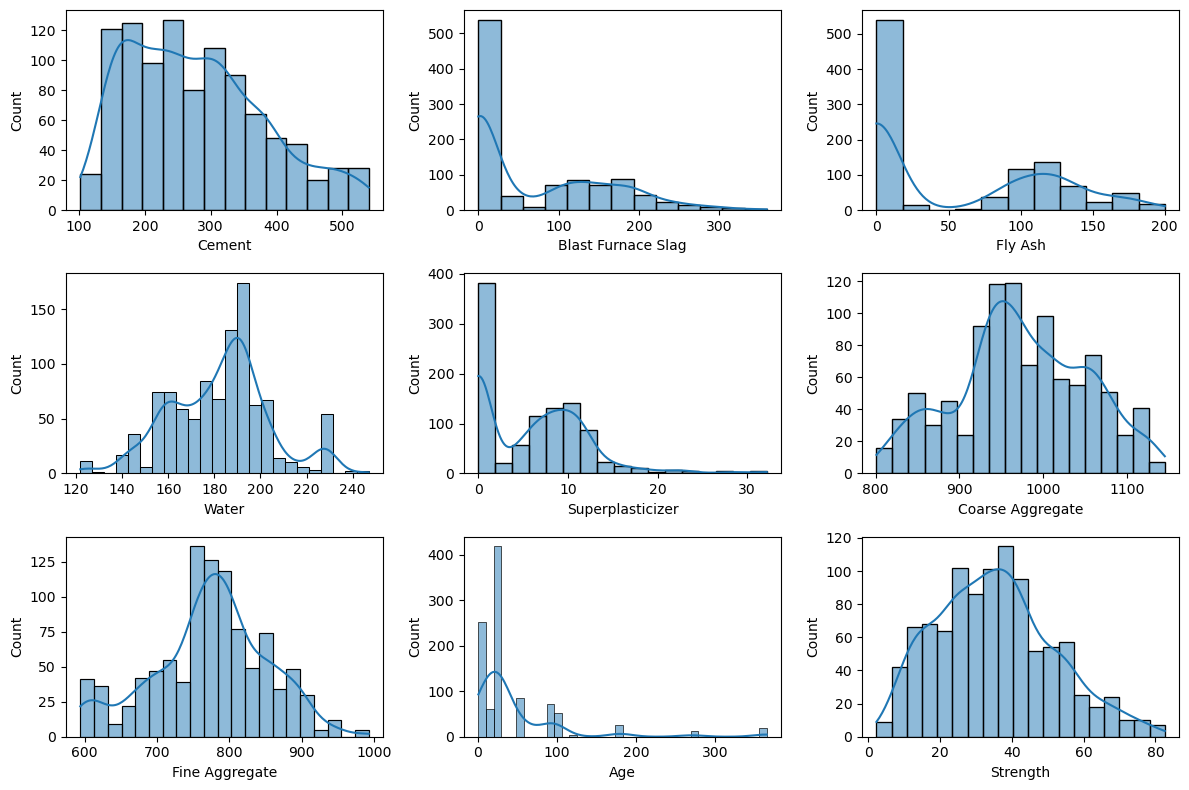

In [10]:
# Visualizing distributions of features
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
plt.tight_layout()
plt.show()

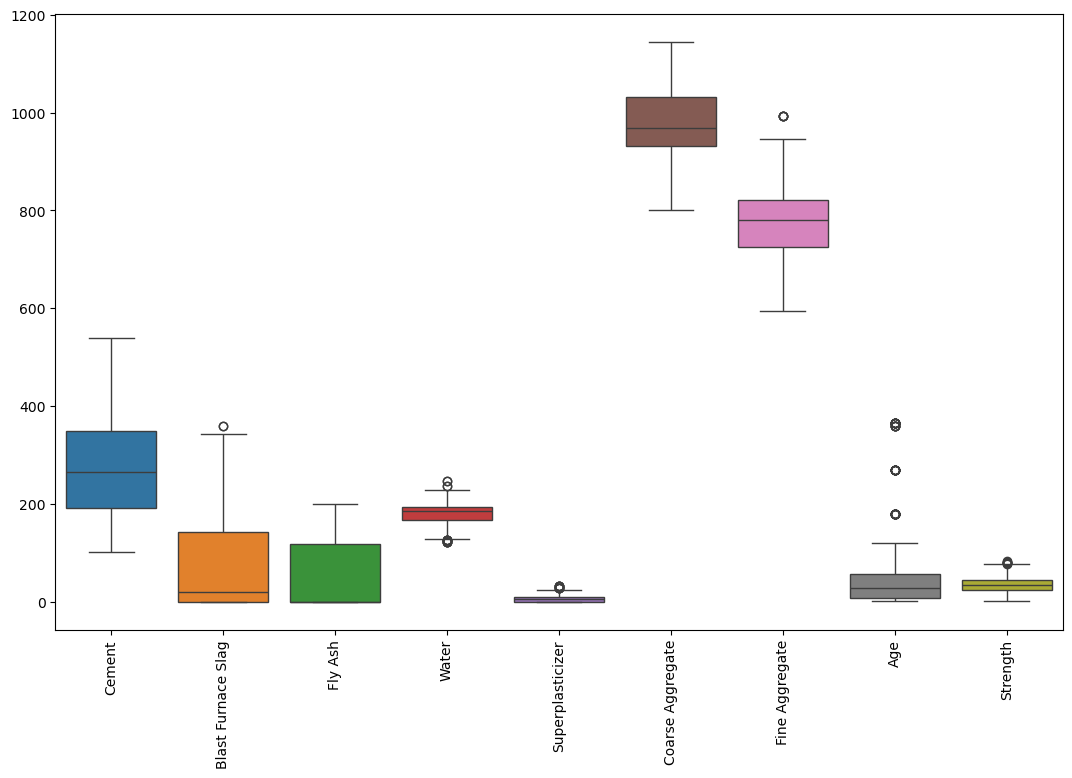

In [11]:
# Boxplot for outlier detection
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [12]:

# Function to replace outliers with the mean
def replace_outliers_with_mean(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
        print(f"{col}: {outlier.sum()} outliers")

        # Replace outliers with the mean
        df.loc[outlier, col] = df[col].mean()
    return df

Blast Furnace Slag: 2 outliers
Water: 15 outliers
Superplasticizer: 10 outliers
Fine Aggregate: 5 outliers
Age: 59 outliers
Strength: 8 outliers


C:\Users\Pradeesh\AppData\Local\Temp\ipykernel_27872\3572799145.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.85671641791045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier, col] = df[col].mean()


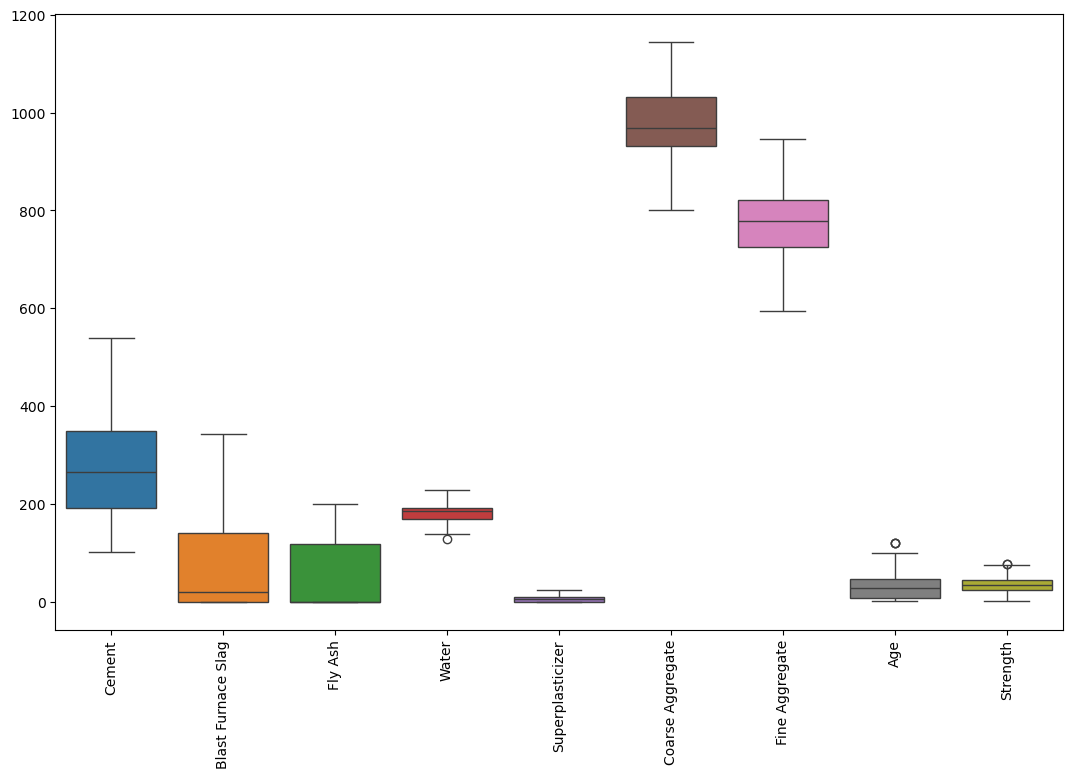

In [13]:
# Replace outliers in specified columns
df = replace_outliers_with_mean(df, ['Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age', 'Strength'])
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Water: 1 outliers
Age: 3 outliers
Strength: 2 outliers


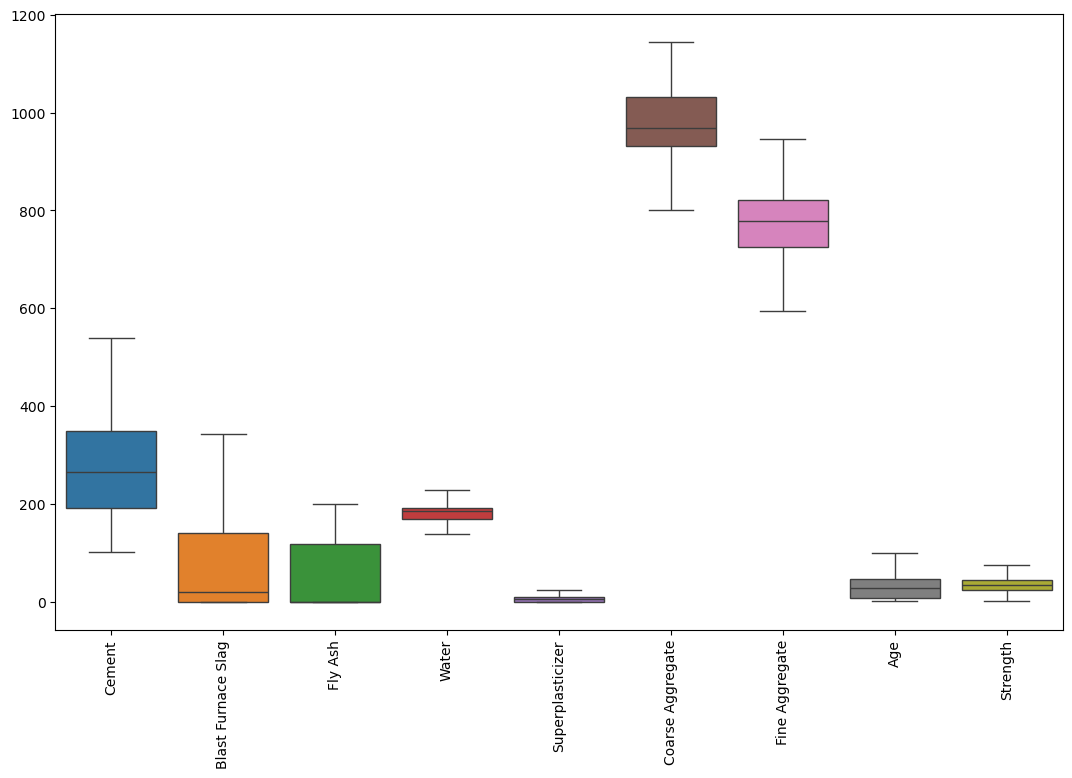

In [14]:
# Further outlier treatment
df = replace_outliers_with_mean(df, ['Water', 'Age', 'Strength'])
plt.figure(figsize=(13, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

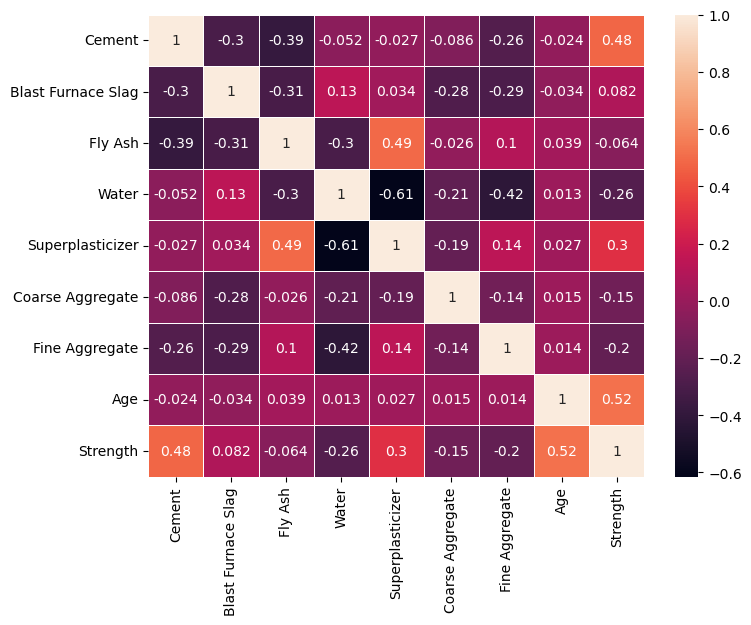

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.show()

In [16]:
# Drop the 'Water' column
df.drop('Water', axis=1, inplace=True)

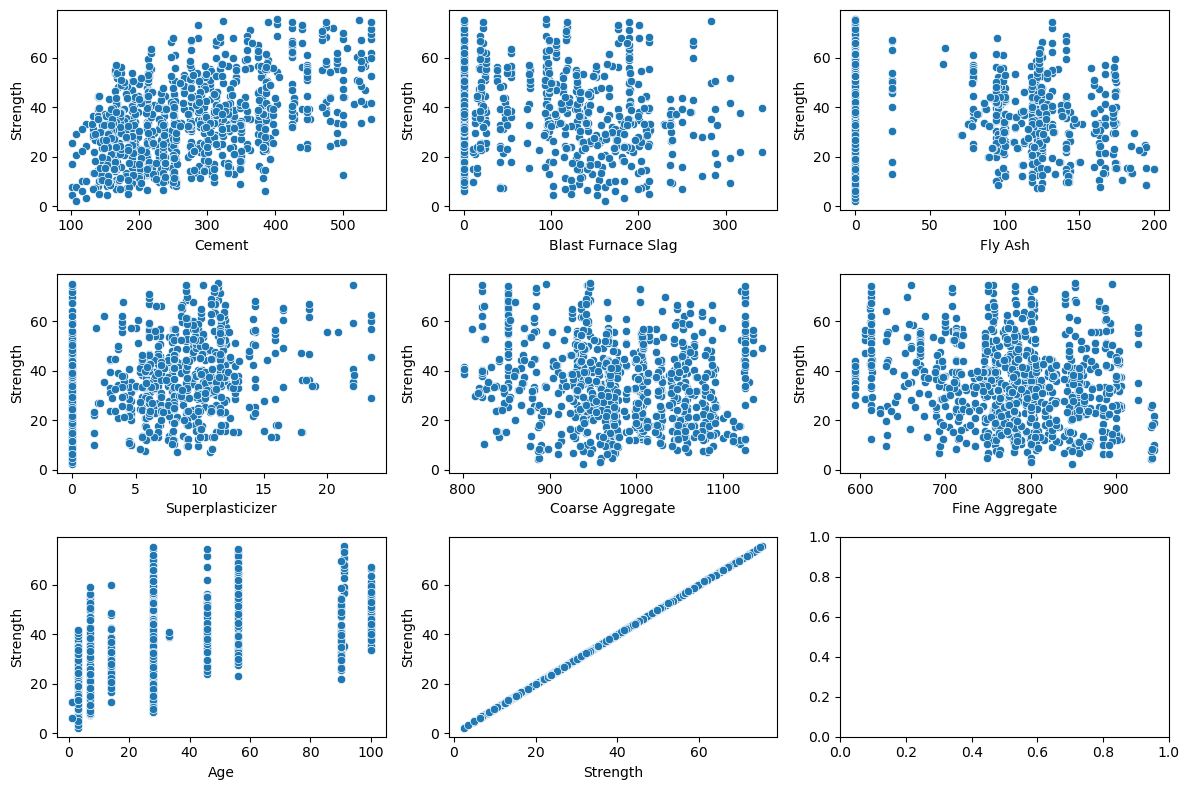

In [17]:
# Visualizing relationships with scatter plots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.scatterplot(x=col, y='Strength', data=df, ax=axes[i])
plt.tight_layout()
plt.show()

In [18]:
# Prepare data for modeling
X = df.drop('Strength', axis=1)
y = df['Strength']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeling 

In [21]:
# Hyperparameter tuning using Randomized Search
rf=RandomForestRegressor()
param_dist = {
    'n_estimators': np.arange(50, 301, 50),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, 
                                   cv=5, n_jobs=-1, verbose=2, scoring='r2', random_state=42)

In [22]:
# Fit Random Search
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters from Random Search:", random_search.best_params_)
print("Best Score (R²):", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from Random Search: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'bootstrap': True}
Best Score (R²): 0.8617399698334742


In [23]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1,
                           max_features=None, max_depth=40, bootstrap=True)

In [24]:
# Fit the model
rf.fit(X_train, y_train)

# Predictions
train_prediction = rf.predict(X_train)
test_prediction = rf.predict(X_test)

In [25]:
# Evaluation metrics
print('Training Set')
print('MSE:', mean_squared_error(y_train, train_prediction))
print('R² Score:', r2_score(y_train, train_prediction))
print('Test Set')
print('MSE:', mean_squared_error(y_test, test_prediction))
print('R² Score:', r2_score(y_test, test_prediction))


Training Set
MSE: 5.246863083522166
R² Score: 0.978752997416166
Test Set
MSE: 42.78758339271021
R² Score: 0.8231532611144772


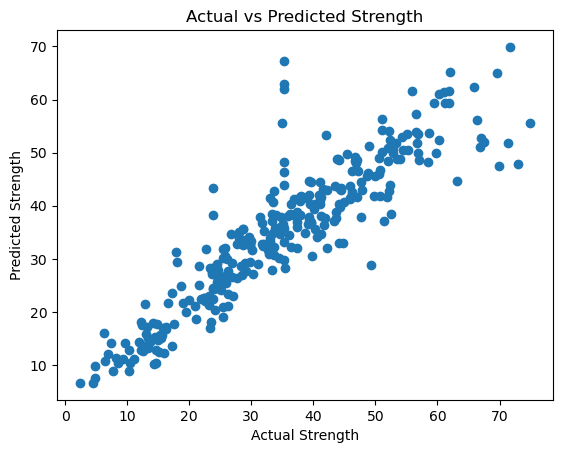

In [26]:
# Scatter plot of predictions
plt.scatter(y_test, test_prediction)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength')
plt.show()